# Term Deposit Sale


## Problem Statement

Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio. 

<b>Resources available</b>

The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


<b>Attribute information</b>
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

#### Analsysis Conducted by : Silambarasan Subramanian
https://github.com/ssilambarasan


### Importing libraries

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from yellowbrick.classifier import ClassificationReport, ROCAUC
import pydotplus
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
tds=pd.read_csv('bank-full.csv')

### Univariate Analysis

In [3]:
tds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
tds.shape

(45211, 17)

In [5]:
tds.isnull().values.any()

False

In [6]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
tds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- There are 45211 rows with 17 columns 
- There are no null values 

In [8]:
cols=['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'day', 'month','poutcome']
for i in cols:
    print(i,":")
    print(tds[i].unique())
    print("")

job :
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital :
['married' 'single' 'divorced']

education :
['tertiary' 'secondary' 'unknown' 'primary']

default :
['no' 'yes']

housing :
['yes' 'no']

loan :
['no' 'yes']

contact :
['unknown' 'cellular' 'telephone']

day :
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome :
['unknown' 'failure' 'other' 'success']



In [9]:
tds.groupby(['Target','poutcome'])['age'].count()

Target  poutcome
no      failure      4283
        other        1533
        success       533
        unknown     33573
yes     failure       618
        other         307
        success       978
        unknown      3386
Name: age, dtype: int64

In [10]:
tds.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

<AxesSubplot:xlabel='balance'>

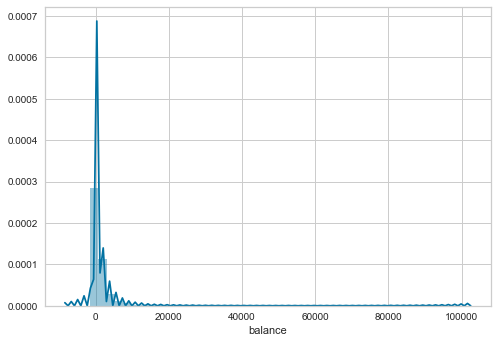

In [11]:
sns.distplot(tds['balance'])

- Balance is positively skewed

<AxesSubplot:xlabel='balance'>

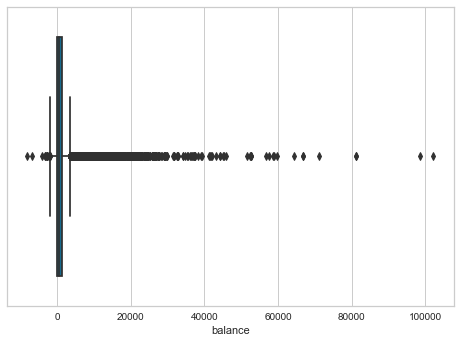

In [12]:
sns.boxplot(tds['balance'])

In [13]:
tds['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

- Several Outliers are found in age, duration & campaign 

In [14]:
old_tds=tds

In [15]:
tds=tds[tds['balance']>0]

In [16]:
tds.shape

(37931, 17)

In [17]:
tds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000
mean,40.985025,1655.270254,15.695790,259.879386,2.718542,41.976510,0.615091
std,10.762390,3240.126649,8.283239,259.235650,2.988197,101.584743,2.419962
min,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,226.500000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,644.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,49.000000,1776.000000,21.000000,322.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
tds.skew()

age          0.689889
balance      8.020565
day          0.106461
duration     3.163282
campaign     4.976872
pdays        2.569425
previous    42.599595
dtype: float64

- Data is still positively skewed for Balance even afer removing negative values Hence retaining the same.

### Multivariate Analysis

In [19]:
tds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


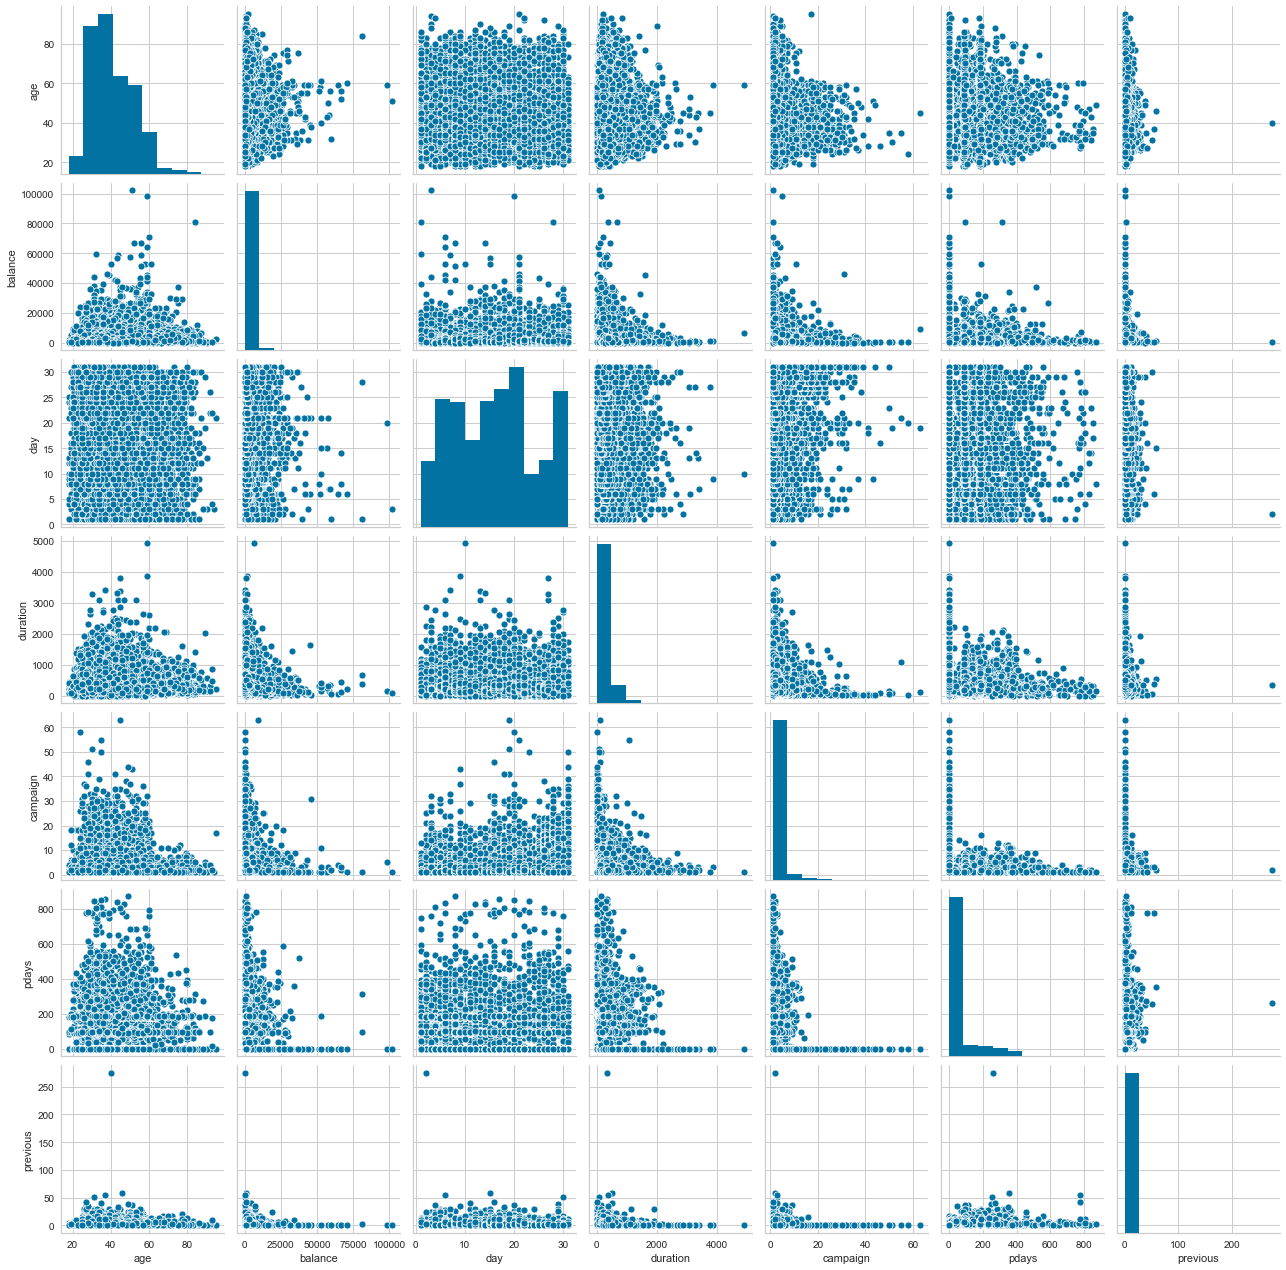

In [20]:
sns.pairplot(tds)

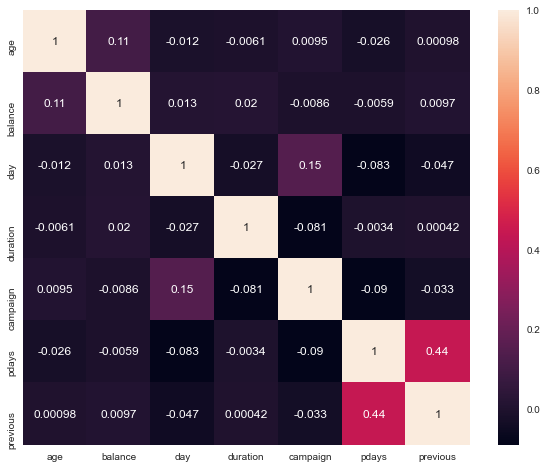

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(tds.corr(), annot=True)
plt.show()

No significant relationship exists

### Data Preparation

In [22]:
tds=tds.drop("day",axis=1)
tds=tds.drop("month",axis=1)
tds=tds.drop("duration",axis=1)
tds=tds.drop("pdays",axis=1)
tds=tds.drop("previous",axis=1)
tds=tds.drop("poutcome",axis=1)
tds=tds.drop("campaign",axis=1)
tds=tds.drop("contact",axis=1)

Dropping off days, month,duration,pdays,previous, poutcome, campaign & contact columns as they dont add much value to this usecase functionally

In [23]:
tds.head()

,age,job,marital,education,default,balance,housing,loan,Target
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


#### Data Model Preparation

In [24]:
tds['Target']=tds['Target'].replace('no',0)
tds['Target']=tds['Target'].replace('yes',1)

In [25]:
tds['Target'].value_counts()

0    33144
1     4787
Name: Target, dtype: int64

In [26]:
X=tds.drop(['Target'],axis=1)
Y=tds['Target']

In [27]:
X=pd.get_dummies(X,columns=['job', 'marital', 'education', 'default','housing','loan'],drop_first=True)

In [28]:
features=X.columns

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [30]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(tds.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(tds.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Logistic Regression Model

In [31]:
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score,precision_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(random_state=3)
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
Y_predict=log_reg.predict(X_test)

In [33]:
z=X_test.copy()
z['Observed TD']=Y_test
z['Predicted TD']=Y_predict
z.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,Observed TD,Predicted TD
3529,53,1140,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
12247,36,4145,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
345,53,18,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
41837,74,279,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18815,38,47,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0


In [34]:
log_reg_score = log_reg.score(X_test, Y_test)

In [35]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': log_reg_score})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.871002


In [36]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('Observerd')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8749199653497043

Testing accuracy 0.8710017574692442

Confusion Matrix


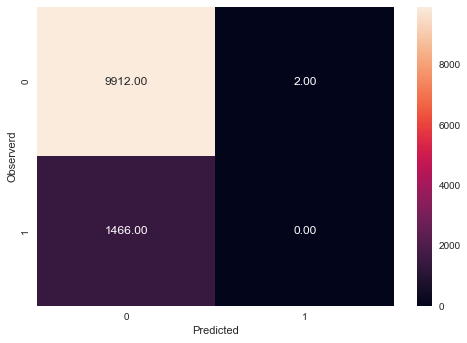

None

Recall: 0.0

Precision: 0.0

F1 Score: 0.0

Roc Auc Score: 0.49989913253984264


In [37]:
print("Trainig accuracy",log_reg.score(X_train,Y_train))  
print()
print("Testing accuracy",log_reg.score(X_test, Y_test))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,Y_predict))
print()
print("Recall:",recall_score(Y_test,Y_predict))
print()
print("Precision:",precision_score(Y_test,Y_predict))
print()
print("F1 Score:",f1_score(Y_test,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,Y_predict))

<b> Both training & testing accuracy is great with Logistic Regression </b>

### Decision Tree

In [38]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [39]:
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
print("Train: %.2f" % model_entropy.score(X_train, Y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, Y_test))  # performance on test data

Train: 0.99
Test: 0.82


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically.
#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [41]:
clf_pruned=DecisionTreeClassifier(criterion="entropy",max_depth=5)
clf_pruned.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
print("Train: %.2f" % clf_pruned.score(X_train, Y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, Y_test))  # performance on test data

Train: 0.88
Test: 0.87


In [43]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  


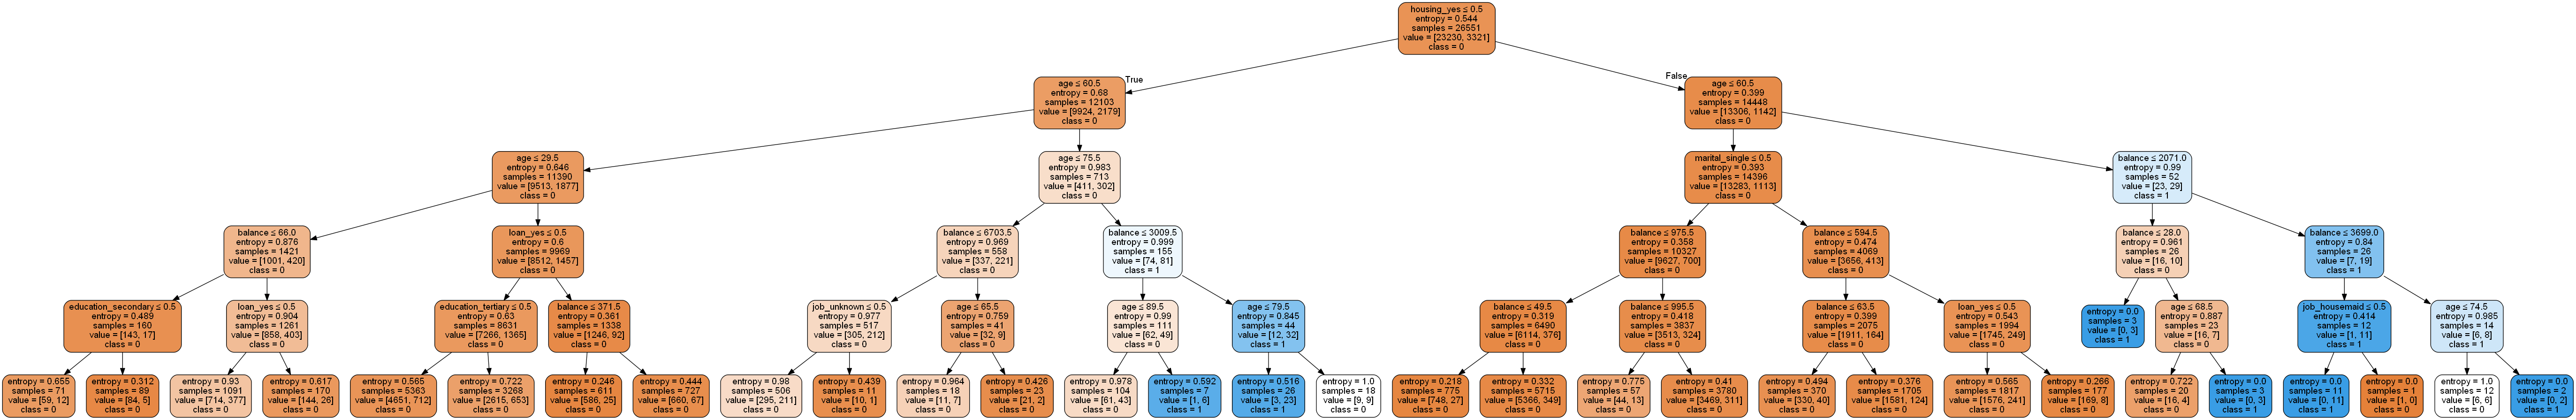

In [44]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tds_decisontree_pruned.png')
Image(graph.create_png())

In [45]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(Y_test, preds_test)

In [46]:
pd.crosstab(Y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,9908,6
1,1458,8


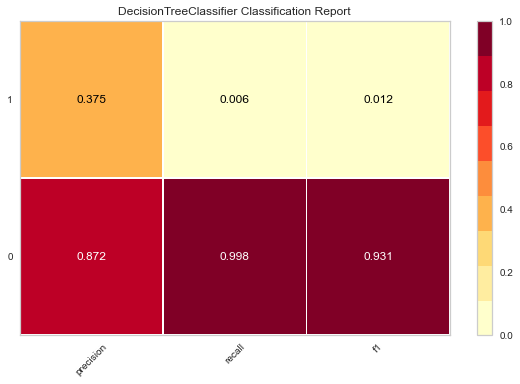

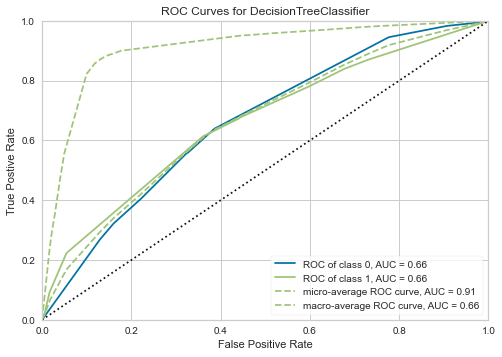

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [47]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

In [48]:
X['ProbQuality_0'] = clf_pruned.predict_proba(X[features])[:,0]
X['ProbQuality_1'] = clf_pruned.predict_proba(X[features])[:,1]
X.head(10)

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,ProbQuality_0,ProbQuality_1
0,58,2143,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0.917725,0.082275
1,44,29,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0.891892,0.108108
2,33,2,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0.965161,0.034839
3,47,1506,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0.917725,0.082275
4,33,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0.867238,0.132762
5,35,231,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0.938933,0.061067
6,28,447,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0.927273,0.072727
7,42,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0.965161,0.034839
8,58,121,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0.938933,0.061067
9,43,593,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0.927273,0.072727


In [49]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
housing_yes,0.391305
age,0.342435
balance,0.101830
loan_yes,0.082257
education_tertiary,0.042643
marital_single,0.028125
job_housemaid,0.004373
job_unknown,0.003644
education_secondary,0.003388
job_services,0.000000


- <b> Customers with housing loan
- Age
- the balane they hold with the bank 
   
 are the influencing factors for to determine the potential candidate for targetting term deposits</b>

In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.871002
0,Decision Tree,0.871353


## Ensemble Methods

In [51]:
# Random Forests

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

In [53]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(Y_test, pred_RF)

In [54]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.871002
0,Decision Tree,0.871353
0,Random Forest,0.865817


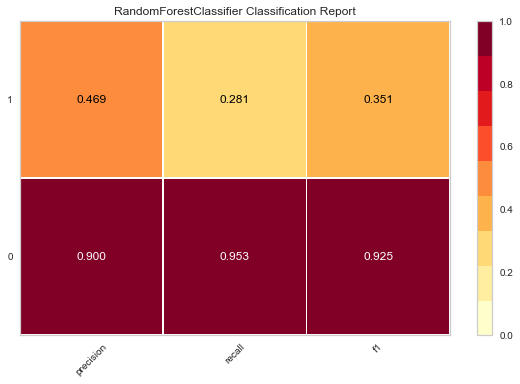

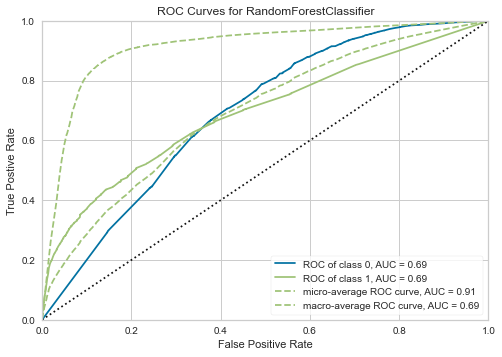

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [55]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [56]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, Y_train)

In [57]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(Y_test, pred_AB)

In [58]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.871002
0,Decision Tree,0.871353
0,Random Forest,0.865817
0,Adaboost,0.871178


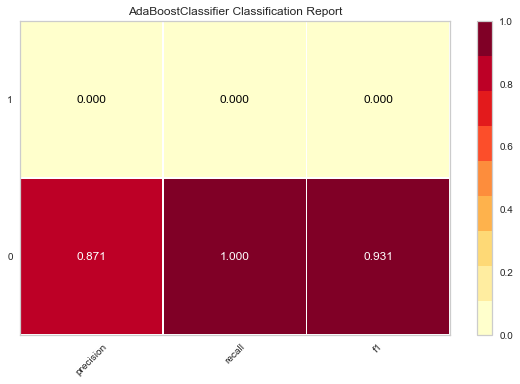

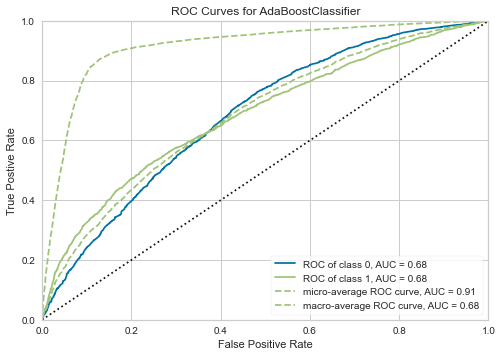

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [59]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

### Apply Bagging Classifier Algorithm and print the accuracy.

In [60]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train,Y_train)

In [61]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(Y_test, pred_BG)

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.871002
0,Decision Tree,0.871353
0,Random Forest,0.865817
0,Adaboost,0.871178
0,Bagging,0.876186


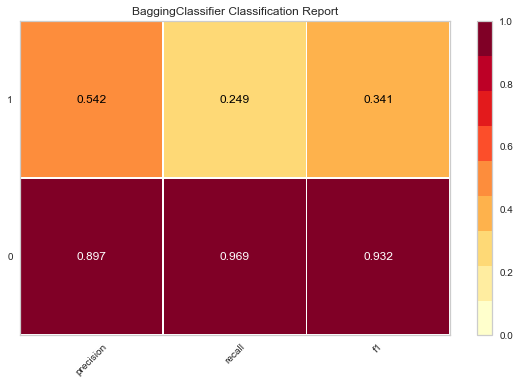

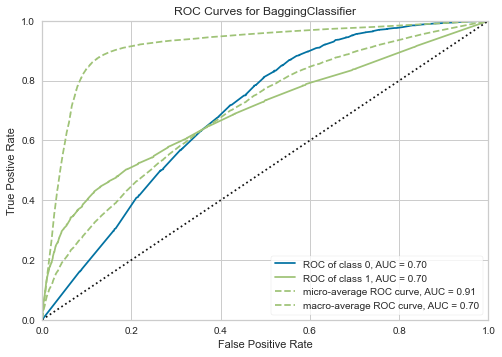

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [63]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train,Y_train)

In [65]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(Y_test, pred_GB)

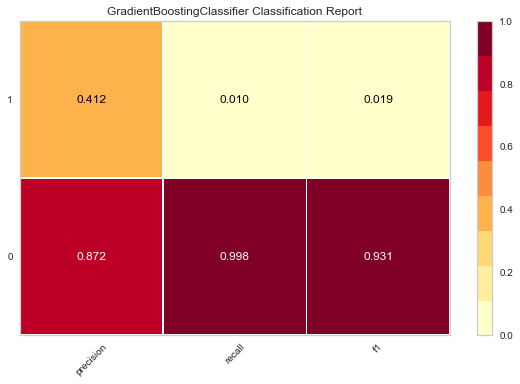

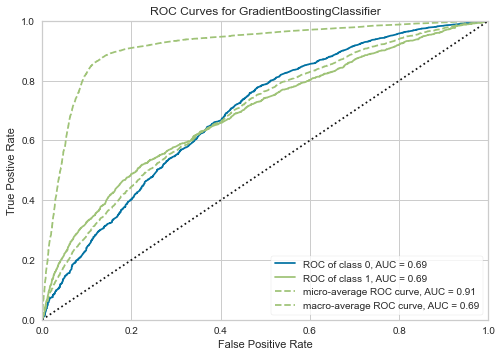

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [66]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, Y_train)
viz.score(X_test, Y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, Y_train)
roc.score(X_test, Y_test)
roc.show()

In [67]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.871002
0,Decision Tree,0.871353
0,Random Forest,0.865817
0,Adaboost,0.871178
0,Bagging,0.876186
0,Bagging,0.870650


### Inference

- Decision Tree after pruning performs very well than any other model for this use case
- As its training accuracy is 88% & testing accuracy is 89%